# Natural Language Processing - Обработка естественного языка

## Синтаксис и формальные языки

## Айдар Валеев
* аспирант Университета Иннополис
* интересы: Глубокое обучение, Машинный перевод, Генерация комментариев для исходного кода


<br>

---
<br>

# Прошлая лекция
* Токенизация
    - "Я люблю учиться." -> ["Я", "люблю", "учиться", "."]
* Лемматизация и стеминг
    - люблю -> любить
    - люблю -> люб
* Инструменты
    - nltk
    - pymorhy2
* Bag-of-Words
    - "Я люблю учиться." -> {"люблю": 1, "учиться": 1}, "я" - стоп-слово
* Byte-pair Encoding
    - "Я люблю учиться." -> ["Я", "люб", "##лю", "учит", "##ь", "##ся", "."]

<br>

---
<br>

# План на сегодня
* **Синтаксис**
* Формальные языки
* Иерархия хомского
* Синтаксический парсер
* Регулярные выражения
* Чат-бот


<br>

--- 
<br>

## Синтаксис

### Что такое синтаксис?
Синтаксис - взаимосвязи и зависимости слов друг от друга в предложении

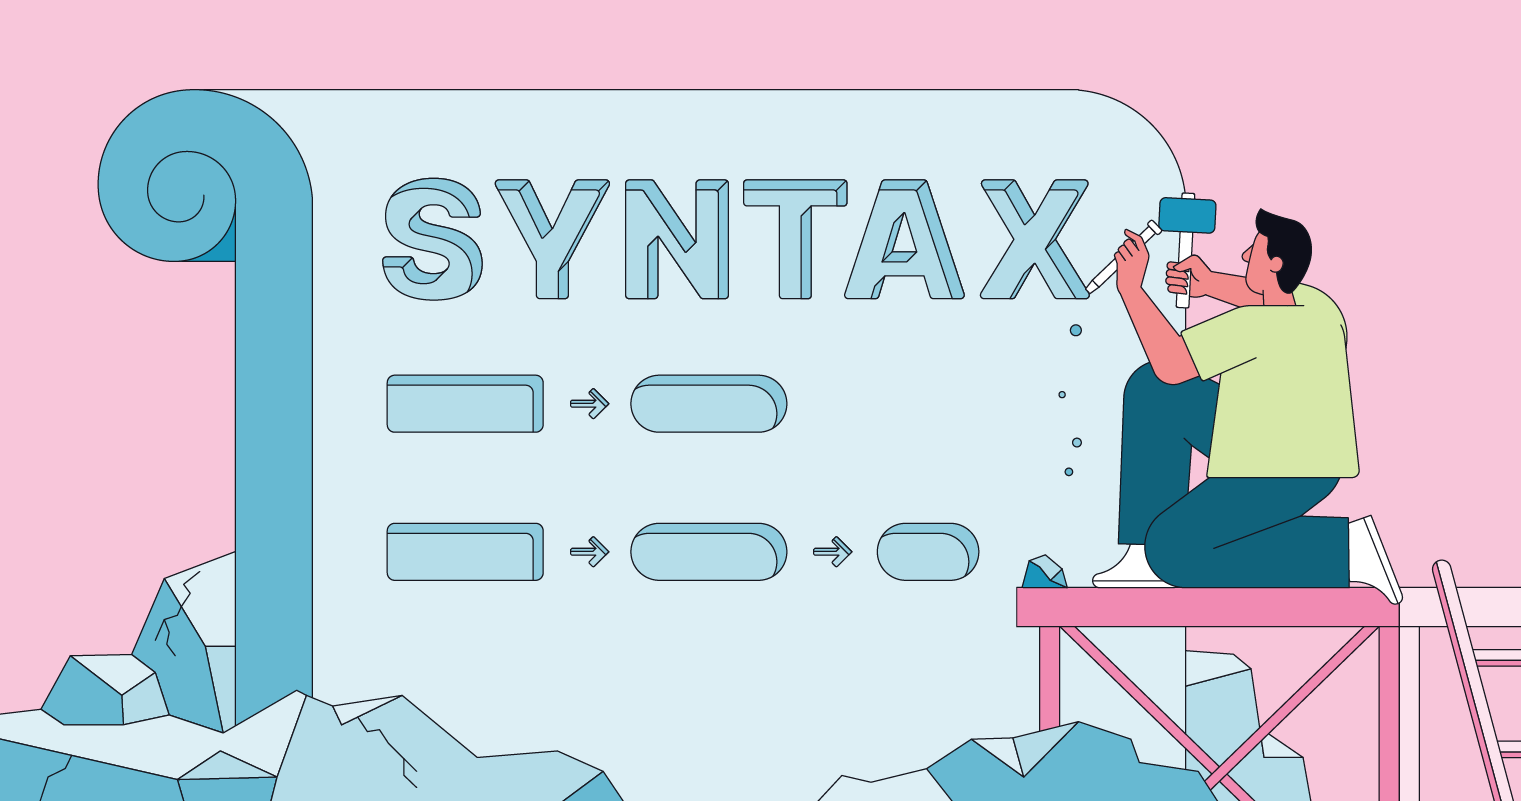

#### Пример 1
"Это предложение устроено по правилам синтаксиса русского языка"

"Это русского устроено языка правилам предложение по синтаксиса"

#### Пример 2
"Люблю не много, а мало света в комнате"

"Люблю не мало, а много света в комнате"

#### Вывод

Слова могут быть те же, а смысл предложение может иметь разный или вообще его не иметь.

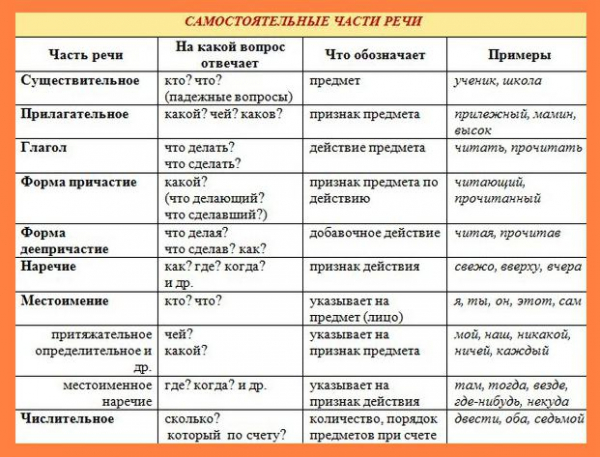

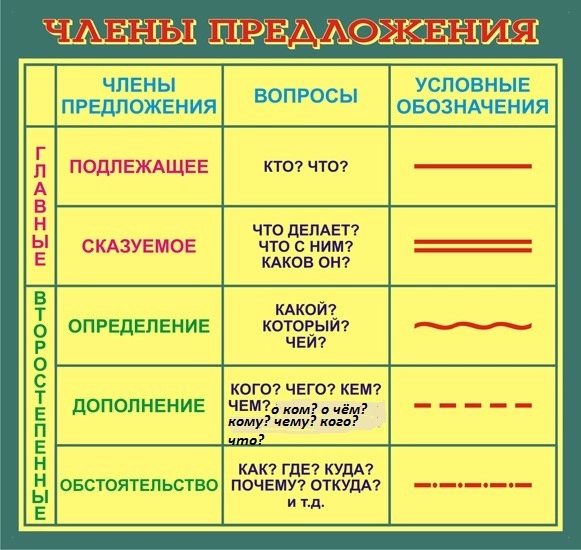

<br>

---
<br>

# План на сегодня
* Синтаксис
* **Формальные языки**
* Иерархия хомского
* Синтаксический парсер
* Регулярные выражения
* Чат-бот


<br>

--- 
<br>

## Формальные языки

1. "Я ем капусту" = Подлежащее + Сказуемое + Объект = Предложение

2. "Трудолюбивые студенты старательно учатся обработке естественных языков" = 
   
   = Подлежащее + Сказуемое + Объект = Предложение

<br>

--- 
<br>

Попробуем выразить грамматику через формулы (с допущениями):

* Предложение = Подлежащее + Сказуемое + Объект
* Подлежащее = Прилагательное + Существительное
* Сказуемое = Наречие + Глагол
* Объект = Прилагательное + Существительное
* ...

Разумеется, русский язык намного сложнее, чем эта грамматика.

Но бывает полезно придумать свой формальный язык, определив его подобной формальной грамматикой.

<br>

--- 
<br>

### А какой самый простой возможный язык?

А что вообще такое язык?

* Не любая последовательность русских букв или слов принадлежит русскому языку
* Длина предложения хоть обычно ограничевается 10-30 словами, но правилами не ограничена
* Существует словарь русского языка со всеми русскими словами (всеми ли?)

<br>

Если обобщить

* У языка должен быть словарь слов (алфавит)
* Предложения могут быть составлены из этих слов по установленным правилам - грамматике

<br>

Самый простой формальный язык:
* Словарь W = {a}
* Грамматика G = {"w", w ∈ W}
* Тогда возможно только одно предложение на этом языке - "а"

<br>

Усложним этот язык:
* Словарь W = {a}
* Грамматика G = {"w+", w ∈ W}
* Возможные предложения - "а", "a a", "a a a", ...

<br>

--- 

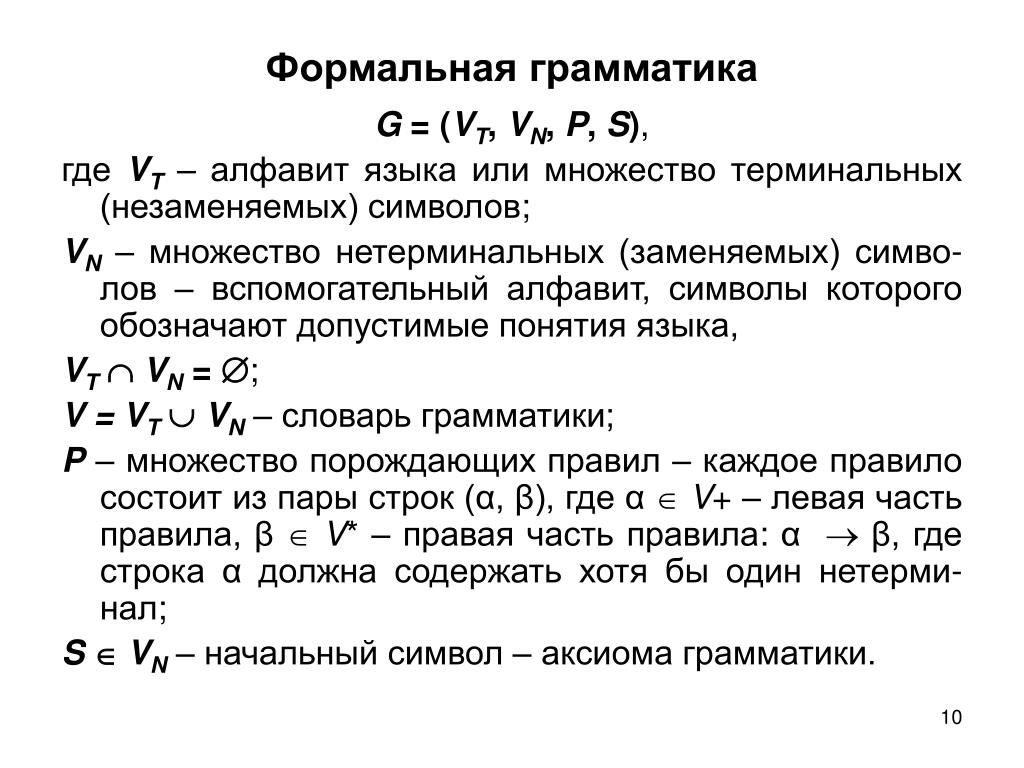

### Формальная грамматика на пальцах

Тот же самый язык в этих обозначениях:

* Словарь терминальных символов $V_T$ = {a}
* Словарь нетерминальных символов $V_N$ = {S}
* S - начальный символ
* Грамматика 
    ```
    P = {
      S -> S a
      S -> a
    }
    ```


<br>

--- 

In [ ]:
"a a a a"

aSb -> cB

"S" -> "S a"
"S a" -> "S a a"
"a a a"

Грамматика для калькулятора
* Словарь терминальных символов $V_T$ = {0123456789.+-}
* Словарь нетерминальных символов $V_N$ = {S,Int,Float,Expr,Digit}
* $S$ - начальный символ
* Грамматика 
    ```
    P = {
      S -> Expr
      Expr -> Expr + Expr
      Expr -> Expr - Expr
      Expr -> Float
      Expr -> Int
      Float -> Int.Int
      Int   -> Digit+
      Digit -> 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
    }
    ```

<br>

---
<br>

# План на сегодня
* Синтаксис
* Формальные языки
* **Иерархия хомского**
* Синтаксический парсер
* Регулярные выражения
* Чат-бот

<br>

---
<br>

## Иерархия Хомского

Согласно Хомскому, формальные грамматики можно разделить на четыре типа:

* Регулярные
* Контекстно-свободные
* Контекстно-зависимые
* Рекурсивно-перечислимые


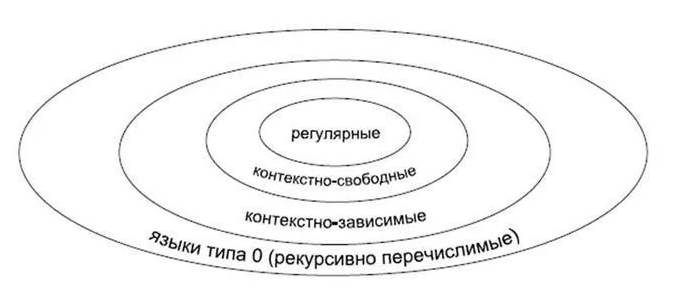

### Тип 3. Регулярная грамматика
* Грамматика $G = (V_T, V_N, Р, S)$ - регулярная, если ее правила вывода имеют вид:

  * $A→γB$ или $A→γ$
  * где $γ∈V_T*, A, B∈V_N$ 
  * (или же $A→Bγ$ и $A→γ$ -- леволинейная регулярная грамматика)

### Тип 2. Контекстно-свободная грамматика
* Грамматика $G = (V_T, V_N, Р, S)$ называется контекстно-свободной грамматикой, если ее правила вывода имеют вид:
  * $A→β$
  * где $β∈V+$, $A∈V_N$
  * то есть грамматика допускает появление в левой части правила только нетерминального символа


### Тип 1. Контекстно-зависимая грамматика
* Грамматика $G = (V_T, V_N, Р, S)$ называется контекстно-зависимой грамматикой, если каждое правило имеет вид:
  * $αAβ→αγβ$
  * где $α, β∈V*, γ∈V+, A∈V_N$

### Тип 0. Рекурсивно-перечислимая грамматика
* Грамматика $G = (V_T, V_N, Р, S)$ называется грамматикой типа 0, если на ее правила вывода не накладывается никаких ограничений, кроме тех, которые указаны в определении грамматики.

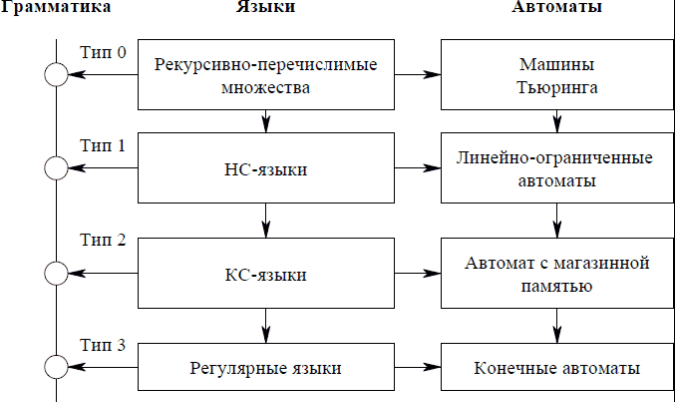

<br>

---
<br>

Все естественные языки относятся к рекурсивно-перечислимым
* поэтому системы на правилах (rule-based) не могут показать свободного владения языка
* а вот гиганские нейронные сети с миллиардами параметров могут
    * но у них другая проблема - они часто отвлекаются от установленных правил

Регулярные выражения

re.sub(r"", r"", s)

[Иерархия Хомского формальных грамматик](https://neerc.ifmo.ru/wiki/index.php?title=Иерархия_Хомского_формальных_грамматик)

[Примеры решения задач по теме «Формальные языки и грамматики»](https://ozlib.com/955476/tehnika/primery_resheniya_zadach_teme_formalnye_yazyki_grammatiki)

[Основы теории формальных языков](http://dspace.kgsu.ru/xmlui/bitstream/handle/123456789/5086/Медведев-АА_2018_МУ.pdf)

<br>

---
<br>

# План на сегодня
* Синтаксис
* Формальные языки
* Иерархия хомского
* **Синтаксический парсер**
* Регулярные выражения
* Чат-бот


<br>

--- 
<br>

## Синтаксический парсер

In [ ]:
!python -m spacy download en_core_web_sm
clear_output()

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc2 = nlp("Autonomous cars shift insurance liability toward manufacturers")

In [ ]:
for chunk in doc2.noun_chunks:
    print(f"{chunk.text} | {chunk.root.text} | {chunk.root.dep_}")

Autonomous cars | cars | nsubj
insurance liability | liability | dobj
manufacturers | manufacturers | pobj


* nsubj = “nominal subject” = подлежащее
* dobj = “direct object” = прямой объект
* prep = “preposition modifier” = предлог
* pobj = “object of preposition” = объект у предлога
* det = “determiner” = определитель 

In [ ]:
# https://en.wikipedia.org/wiki/Grammatical_relation
# https://universaldependencies.org/en/dep/
print(nlp.get_pipe("parser").labels)

('ROOT', 'acl', 'acomp', 'advcl', 'advmod', 'agent', 'amod', 'appos', 'attr', 'aux', 'auxpass', 'case', 'cc', 'ccomp', 'compound', 'conj', 'csubj', 'csubjpass', 'dative', 'dep', 'det', 'dobj', 'expl', 'intj', 'mark', 'meta', 'neg', 'nmod', 'npadvmod', 'nsubj', 'nsubjpass', 'nummod', 'oprd', 'parataxis', 'pcomp', 'pobj', 'poss', 'preconj', 'predet', 'prep', 'prt', 'punct', 'quantmod', 'relcl', 'xcomp')


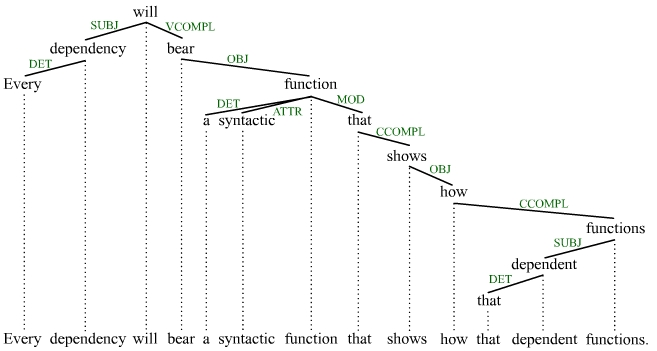

In [ ]:
!pip install stanza
clear_output()

In [ ]:
import stanza

stanza.download('ru')
nlp = stanza.Pipeline('ru')

INFO:stanza:Downloading default packages for language: ru (Russian) ...
INFO:stanza:File exists: /root/stanza_resources/ru/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[Universal features](https://universaldependencies.org/u/feat/index.html)

In [ ]:
print(nlp(s2))

[
  [
    {
      "id": 1,
      "text": "Трудолюбивые",
      "lemma": "трудолюбивый",
      "upos": "ADJ",
      "feats": "Case=Nom|Degree=Pos|Number=Plur",
      "head": 2,
      "deprel": "amod",
      "start_char": 0,
      "end_char": 12,
      "ner": "S-MISC",
      "multi_ner": [
        "S-MISC"
      ]
    },
    {
      "id": 2,
      "text": "студенты",
      "lemma": "студент",
      "upos": "NOUN",
      "feats": "Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur",
      "head": 4,
      "deprel": "nsubj",
      "start_char": 13,
      "end_char": 21,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "старательно",
      "lemma": "старательно",
      "upos": "ADV",
      "feats": "Degree=Pos",
      "head": 4,
      "deprel": "advmod",
      "start_char": 22,
      "end_char": 33,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "учатся",
      "lemma": "учиться",
      "upo

In [ ]:
print(nlp("Вася Пупкин посетил завод Lamborgini в Италии в декабре 2009 года"))

[
  [
    {
      "id": 1,
      "text": "Вася",
      "lemma": "Вася",
      "upos": "PROPN",
      "feats": "Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing",
      "head": 3,
      "deprel": "nsubj",
      "start_char": 0,
      "end_char": 4,
      "ner": "B-PER",
      "multi_ner": [
        "B-PER"
      ]
    },
    {
      "id": 2,
      "text": "Пупкин",
      "lemma": "Пупкин",
      "upos": "PROPN",
      "feats": "Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing",
      "head": 1,
      "deprel": "appos",
      "start_char": 5,
      "end_char": 11,
      "ner": "E-PER",
      "multi_ner": [
        "E-PER"
      ]
    },
    {
      "id": 3,
      "text": "посетил",
      "lemma": "посетить",
      "upos": "VERB",
      "feats": "Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act",
      "head": 0,
      "deprel": "root",
      "start_char": 12,
      "end_char": 19,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 

<br>

---
<br>

# План на сегодня
* Синтаксис
* Формальные языки
* Иерархия хомского
* Синтаксический парсер
* **Регулярные выражения**
* Чат-бот


<br>

--- 
<br>

## Регулярные выражения

[Tproger: практическое применение регулярок](https://tproger.ru/translations/regular-expression-python/)

[Habr: Регулярные выражения в Python от простого к сложному.](https://habr.com/ru/post/349860/)

[Python Doc: Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html)

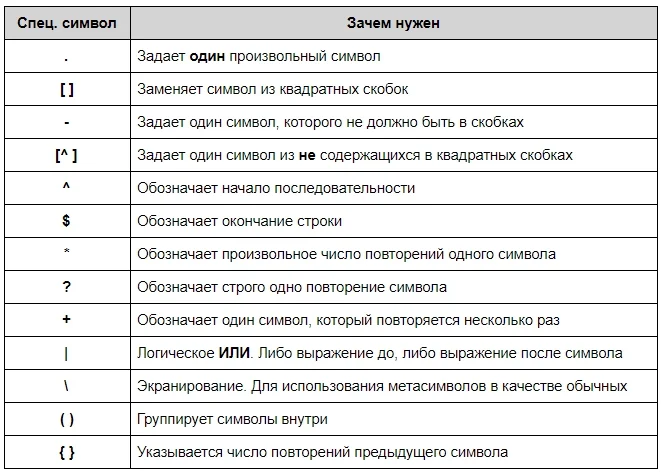

сп рт

In [ ]:
import re

x = re.match("сп.рт", "спорт")
print("сп.рт:", x.group(0) if x is not None else x)

x = re.match("сп.рт", "спгрт")
print("сп.рт:", x.group(0) if x is not None else x)

сп.рт: спорт
сп.рт: спгрт


In [ ]:
regex = "сп[ио]рт"
x = re.match(regex, "я люблю спорт")
print("сп.рт:", x.group(0) if x is not None else x)

x = re.match(regex, "спирт")
print("сп.рт:", x.group(0) if x is not None else x)

x = re.match(regex, "спгрт")
print("сп.рт:", x.group(0) if x is not None else x)

сп.рт: None
сп.рт: спирт
сп.рт: None


In [ ]:
regex = "^сп[ио]рт"
x = re.search(regex, "спорт я люблю спорт")
print("сп.рт:", x.group(0) if x is not None else x)

сп.рт: спорт


In [ ]:
regex = "^сп[ио]*рт$"
# regex = "^сп(и|о){2,3}рт$"
x = re.match(regex, "спорт")
print("сп.рт:", x.group(0) if x is not None else x)

x = re.match(regex, "спмрт")
print("сп.рт:", x.group(0) if x is not None else x)

x = re.match(regex, "спгрт")
print("сп.рт:", x.group(0) if x is not None else x)

сп.рт: спорт
сп.рт: спмрт
сп.рт: None


```
сп(и|о)рт = (спирт|спорт)

\d = [0-9]

\w = [a-zA-Z0-9_]

\s = [ \t\n\r\f\v]
```


* re.match() - сопоставить всю строку с регулярным выражением
* re.search() - найти в строке подстроку, подходящую под регулярное выражение
* re.findall() - найти все подстроки, подходящие под регулярное выражение
* re.split() - разделить строку на подстроки по реулярке
* re.sub() - заменить подстроку, подходящую под ругулярку, на новую подстроу
* re.compile() - скомпилировать регулярку для более эффективного дальнейшего использования

In [ ]:
print("aaa\\aaa")

aaa\aaa


In [ ]:
print(re.split(r"\*", "aaa*aaa"))

['aaa', 'aaa']


In [ ]:
print(re.match(r'AV', 'AV Analytics Vidhya AV').group(0))
print(re.match(r'Analytics', 'AV Analytics Vidhya AV'))

AV
None


In [ ]:
print(re.search(r'AV', 'AV Analytics Vidhya AV').group(0))
print(re.search(r'Analytics', 'AV Analytics Vidhya AV').group(0))

AV
Analytics


In [ ]:
print(re.findall(r'AV', 'AV Analytics Vidhya AV'))

['AV', 'AV']


In [ ]:
print(re.split(r'[it]', 'Analytics Vidhya'))

['Analy', '', 'cs V', 'dhya']


In [ ]:
re.sub(r'([A-Z]*) Analytics (V)', r'\1 \2 asdasd ', 'Analytics Vidhya AV')

'Analytics Vidhya AV'

In [ ]:
pattern = re.compile('AV')
print(pattern.findall('AV Analytics Vidhya AV'))
print(pattern.findall('AV is largest analytics community of India'))

['AV', 'AV']
['AV']


In [ ]:
re.sub(r"(\d+) (\w+)", r"\2, \1 г.", "2023 май")

'май, 2023 г.'

<br>

---
<br>

# План на сегодня
* Синтаксис
* Формальные языки
* Иерархия хомского
* Синтаксический парсер
* Регулярные выражения
* **Чат-бот**


<br>

--- 
<br>

## Чат-бот

Без теории, сразу к практике

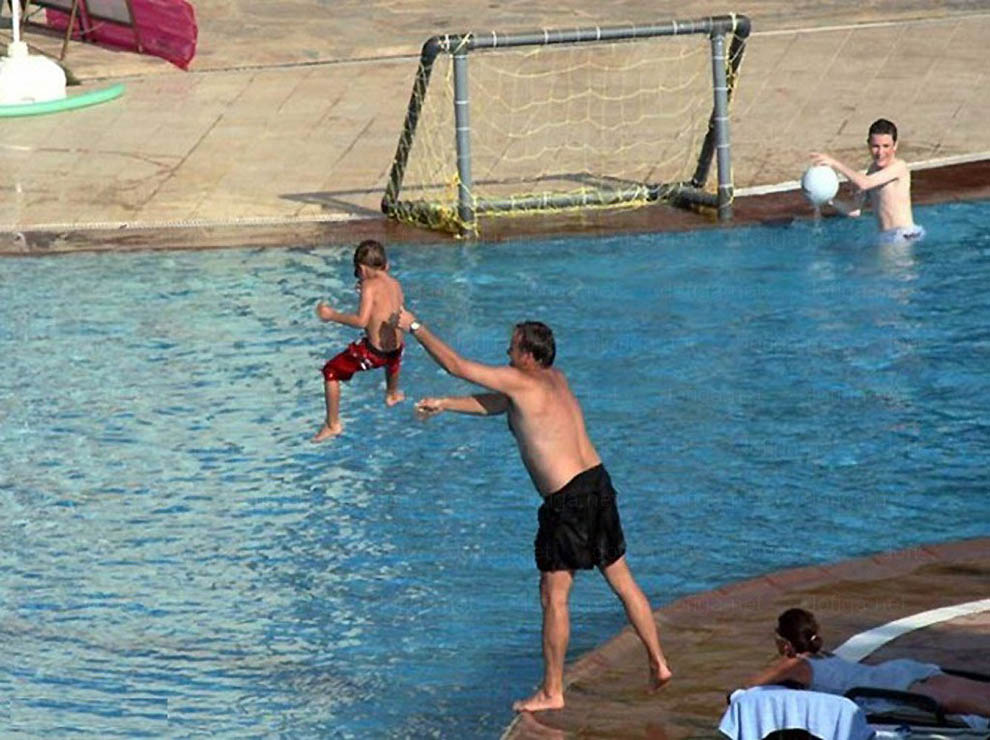

<br>

---

<br>

Допустим нам нужен чат-бот, который будет:
* справшивать по порядку:
    * имя
    * возраст
    * профессию
* и благодарить в конце

<br>

---

<br>

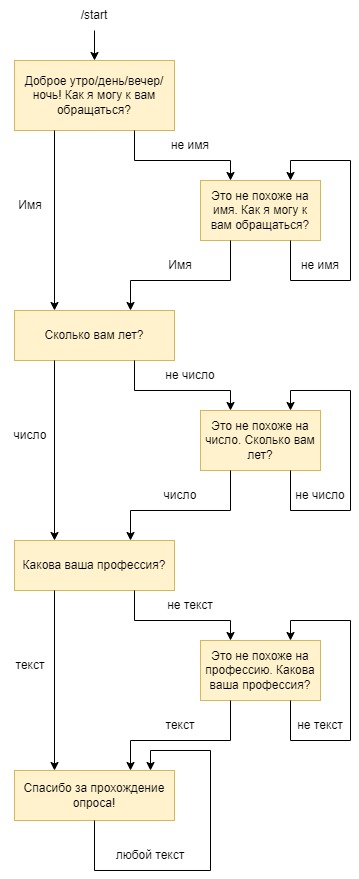

In [ ]:
import re


class SimpleChatBot:
    contexts = {}
    intents = []
    fallback = "Простите, я вас не поняла."

    def get_context(self, user):
        """ получить контекст данного пользователя """
        if user in self.contexts:
            ctx = self.contexts[user]
        else:
            ctx = {"state": "start"}  # состояние по умолчанию - start
            self.contexts[user] = ctx
        return ctx

    def add_intent(self, regex, state, fn):
        """ добавить обработчик в состояние"""
        self.intents.append((regex, state, fn))

    def handle(self, user, message):
        """ обработать полученное сообщение """
        ctx = self.get_context(user)
        # в контексте можно хранить не только состояние, но и данные пользователя
        # в данной реализации контексты обнуляются при перезапуске, стоит задуматься о сохранении их на диск
        ctx["message"] = message 

        for regex, state, handler in self.intents:
            if ctx["state"] == state and re.search(regex, message):
                # save contexts here
                return handler(ctx)
        # save contexts here
        return self.fallback

In [ ]:
from datetime import datetime


skill = SimpleChatBot()


def greet(ctx):
    ctx["state"] = "name"

    now = datetime.now()
    if 6 <= now.hour < 12:
        text = "Доброе утро!"
    elif 12 <= now.hour <= 18:
        text = "Добрый день!"
    elif 18 <= now.hour <= 24:
        text = "Добрый вечер!"
    else:
        text = "Доброй ночи!"

    return text + " Как я могу к вам обращаться?"


def get_name(ctx):
    ctx["name"] = ctx["message"]
    ctx["state"] = "age"
    return f"Приятно познакомиться, {ctx['name']}! Сколько вам лет?"


def get_name_fallback(ctx):
    return "Это не похоже на имя. Как я могу к вам обращаться?"


skill.add_intent(r".*", "start", greet)
skill.add_intent(r"^[А-Я][а-я]+$", "name", get_name)
skill.add_intent(r".*", "name", get_name_fallback)

In [ ]:
def get_age(ctx):
    ctx["age"] = ctx["message"]
    ctx["state"] = "job"
    return "Какова ваша профессия?"


def get_age_fallback(ctx):
    return "Это не похоже на возраст. Сколько вам лет?"


def get_job(ctx):
    ctx["job"] = ctx["message"]
    ctx["state"] = "thanks"
    return "Спасибо за прохождение опроса!"


def get_job_fallback(ctx):
    return "Это не похоже на профессию. Какова ваша профессия?"


def thanks(ctx):
    return "Спасибо за прохождение опроса!"


skill.add_intent(r"\d+ ?(лет|год|года)?", "age", get_age)
skill.add_intent(r".*", "age", get_age_fallback)
skill.add_intent(r"^[А-Я]?[ а-я]+$", "job", get_job)
skill.add_intent(r".*", "job", get_job_fallback)
skill.add_intent(r".*", "thanks", thanks)

In [ ]:
for i in range(10):
    msg = input()
    if 2 in skill.contexts:
        print("#" + str(skill.contexts[2]))
    print(skill.handle(2, msg))

привет
Добрый день! Как я могу к вам обращаться?
Аааааа
#{'state': 'name', 'message': 'привет'}
Приятно познакомиться, Аааааа! Сколько вам лет?
256
#{'state': 'age', 'message': 'Аааааа', 'name': 'Аааааа'}
Какова ваша профессия?
фыфв фывфы
#{'state': 'job', 'message': '256', 'name': 'Аааааа', 'age': '256'}
Спасибо за прохождение опроса!
ываы
#{'state': 'thanks', 'message': 'фыфв фывфы', 'name': 'Аааааа', 'age': '256', 'job': 'фыфв фывфы'}
Спасибо за прохождение опроса!


KeyboardInterrupt: ignored

In [ ]:
!pip install python-telegram-bot nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.4/545.4 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
import nest_asyncio

nest_asyncio.apply()

[Как создать своего бота в BotFather?](https://botcreators.ru/blog/kak-sozdat-svoego-bota-v-botfather/)

[Official BotFather Tutorial](https://core.telegram.org/bots/tutorial)

In [ ]:
from telegram import Update
from telegram.ext import filters, MessageHandler, ApplicationBuilder, CommandHandler, ContextTypes, Updater


async def process_message(update: Update, context: ContextTypes.DEFAULT_TYPE):
    if update.message is not None:
        chat_id = update.effective_chat.id
        msg = update.message.text
        response = skill.handle(chat_id, msg)
        await context.bot.send_message(chat_id=chat_id, text=response)


TOKEN = ""
application = ApplicationBuilder().token(TOKEN).build()
message_handler = MessageHandler(filters.TEXT & filters.COMMAND, process_message)
application.add_handler(message_handler)
application.run_polling()